In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

    ### AHUMUZA ALLAN 2100704497 21/U/04497/EVE 
    ### MUSAASIZI EDWIN KYEYUNE 2100706611 21/U/06611/EVE

In [20]:
ratings=pd.read_csv('C:\\Users\\joyne\\Music\\csvs\\ratings.csv')
movies=pd.read_csv(r'C:\Users\joyne\Music\csvs\movies.csv')

# Describing the data

In [21]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [22]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [23]:
movies.shape

(10329, 3)

In [24]:
ratings.shape

(105339, 4)

In [31]:
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [37]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


# CANDIDATE MODELS

## CONTENT BASED FILTERING MODEL

In [45]:
genres=[]
for genre in movies.genres:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    
movie_title=[]
for title in movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)    

In [46]:
##Visualization of Data

In [47]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2
                    ,min_word_length=3).generate(movie_title)

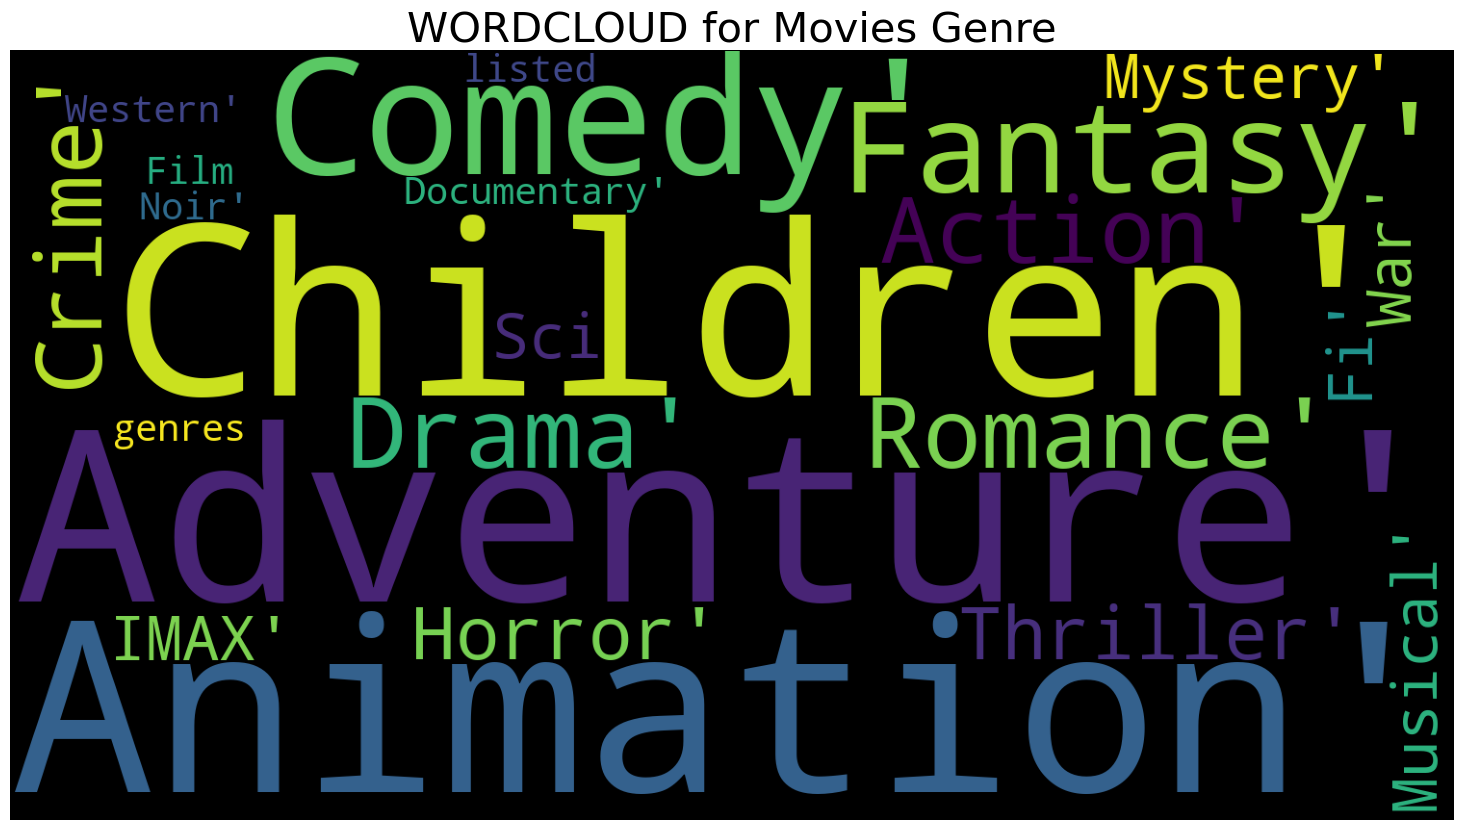

In [48]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)

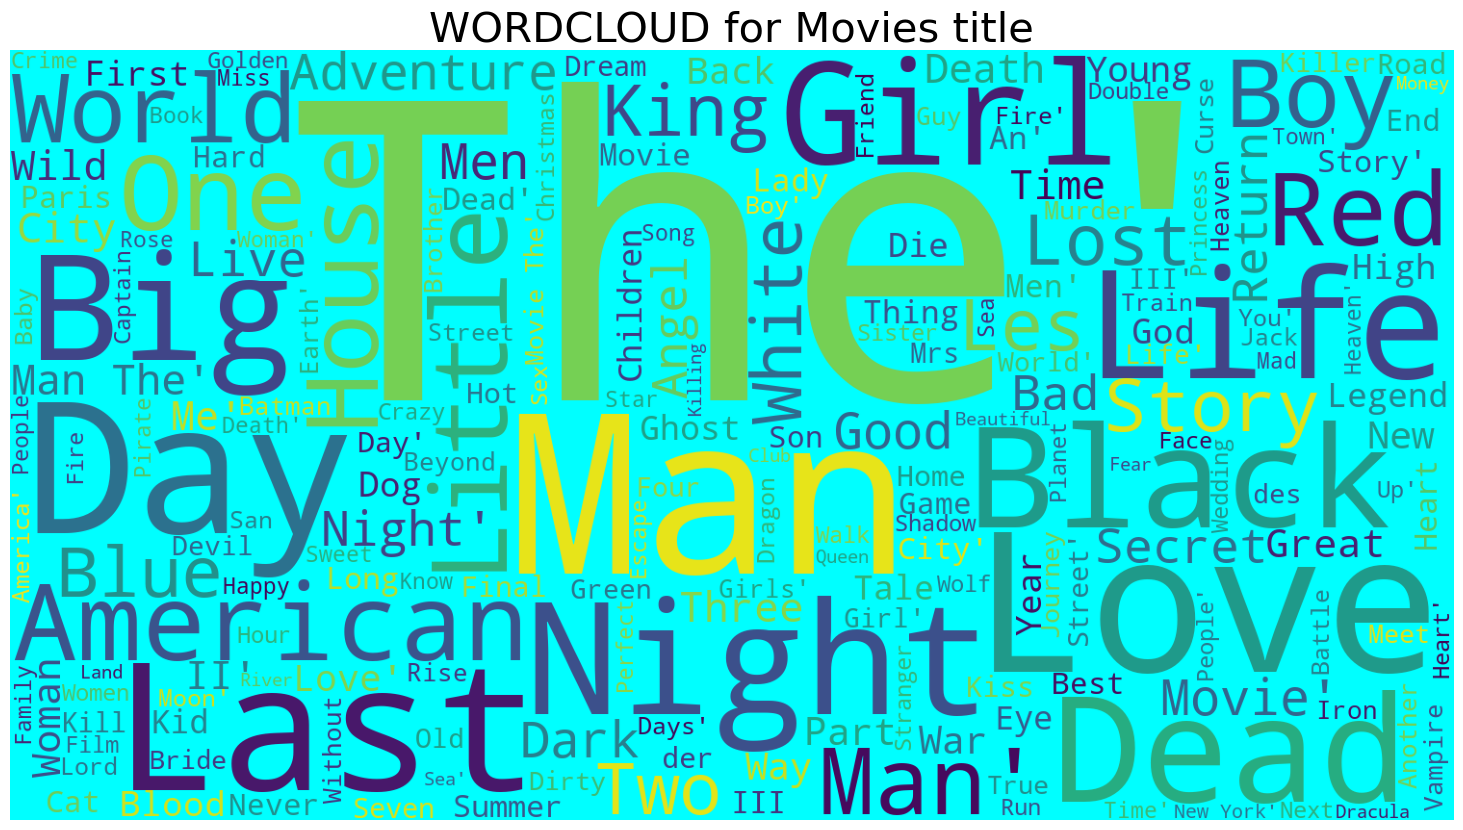

In [49]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies title',fontsize=30)
plt.imshow(wordcloud_title)

In [50]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [52]:
df1=df.groupby(['title'])[['rating']].sum()
high_rated=df1.nlargest(20,'rating')
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


<BarContainer object of 20 artists>

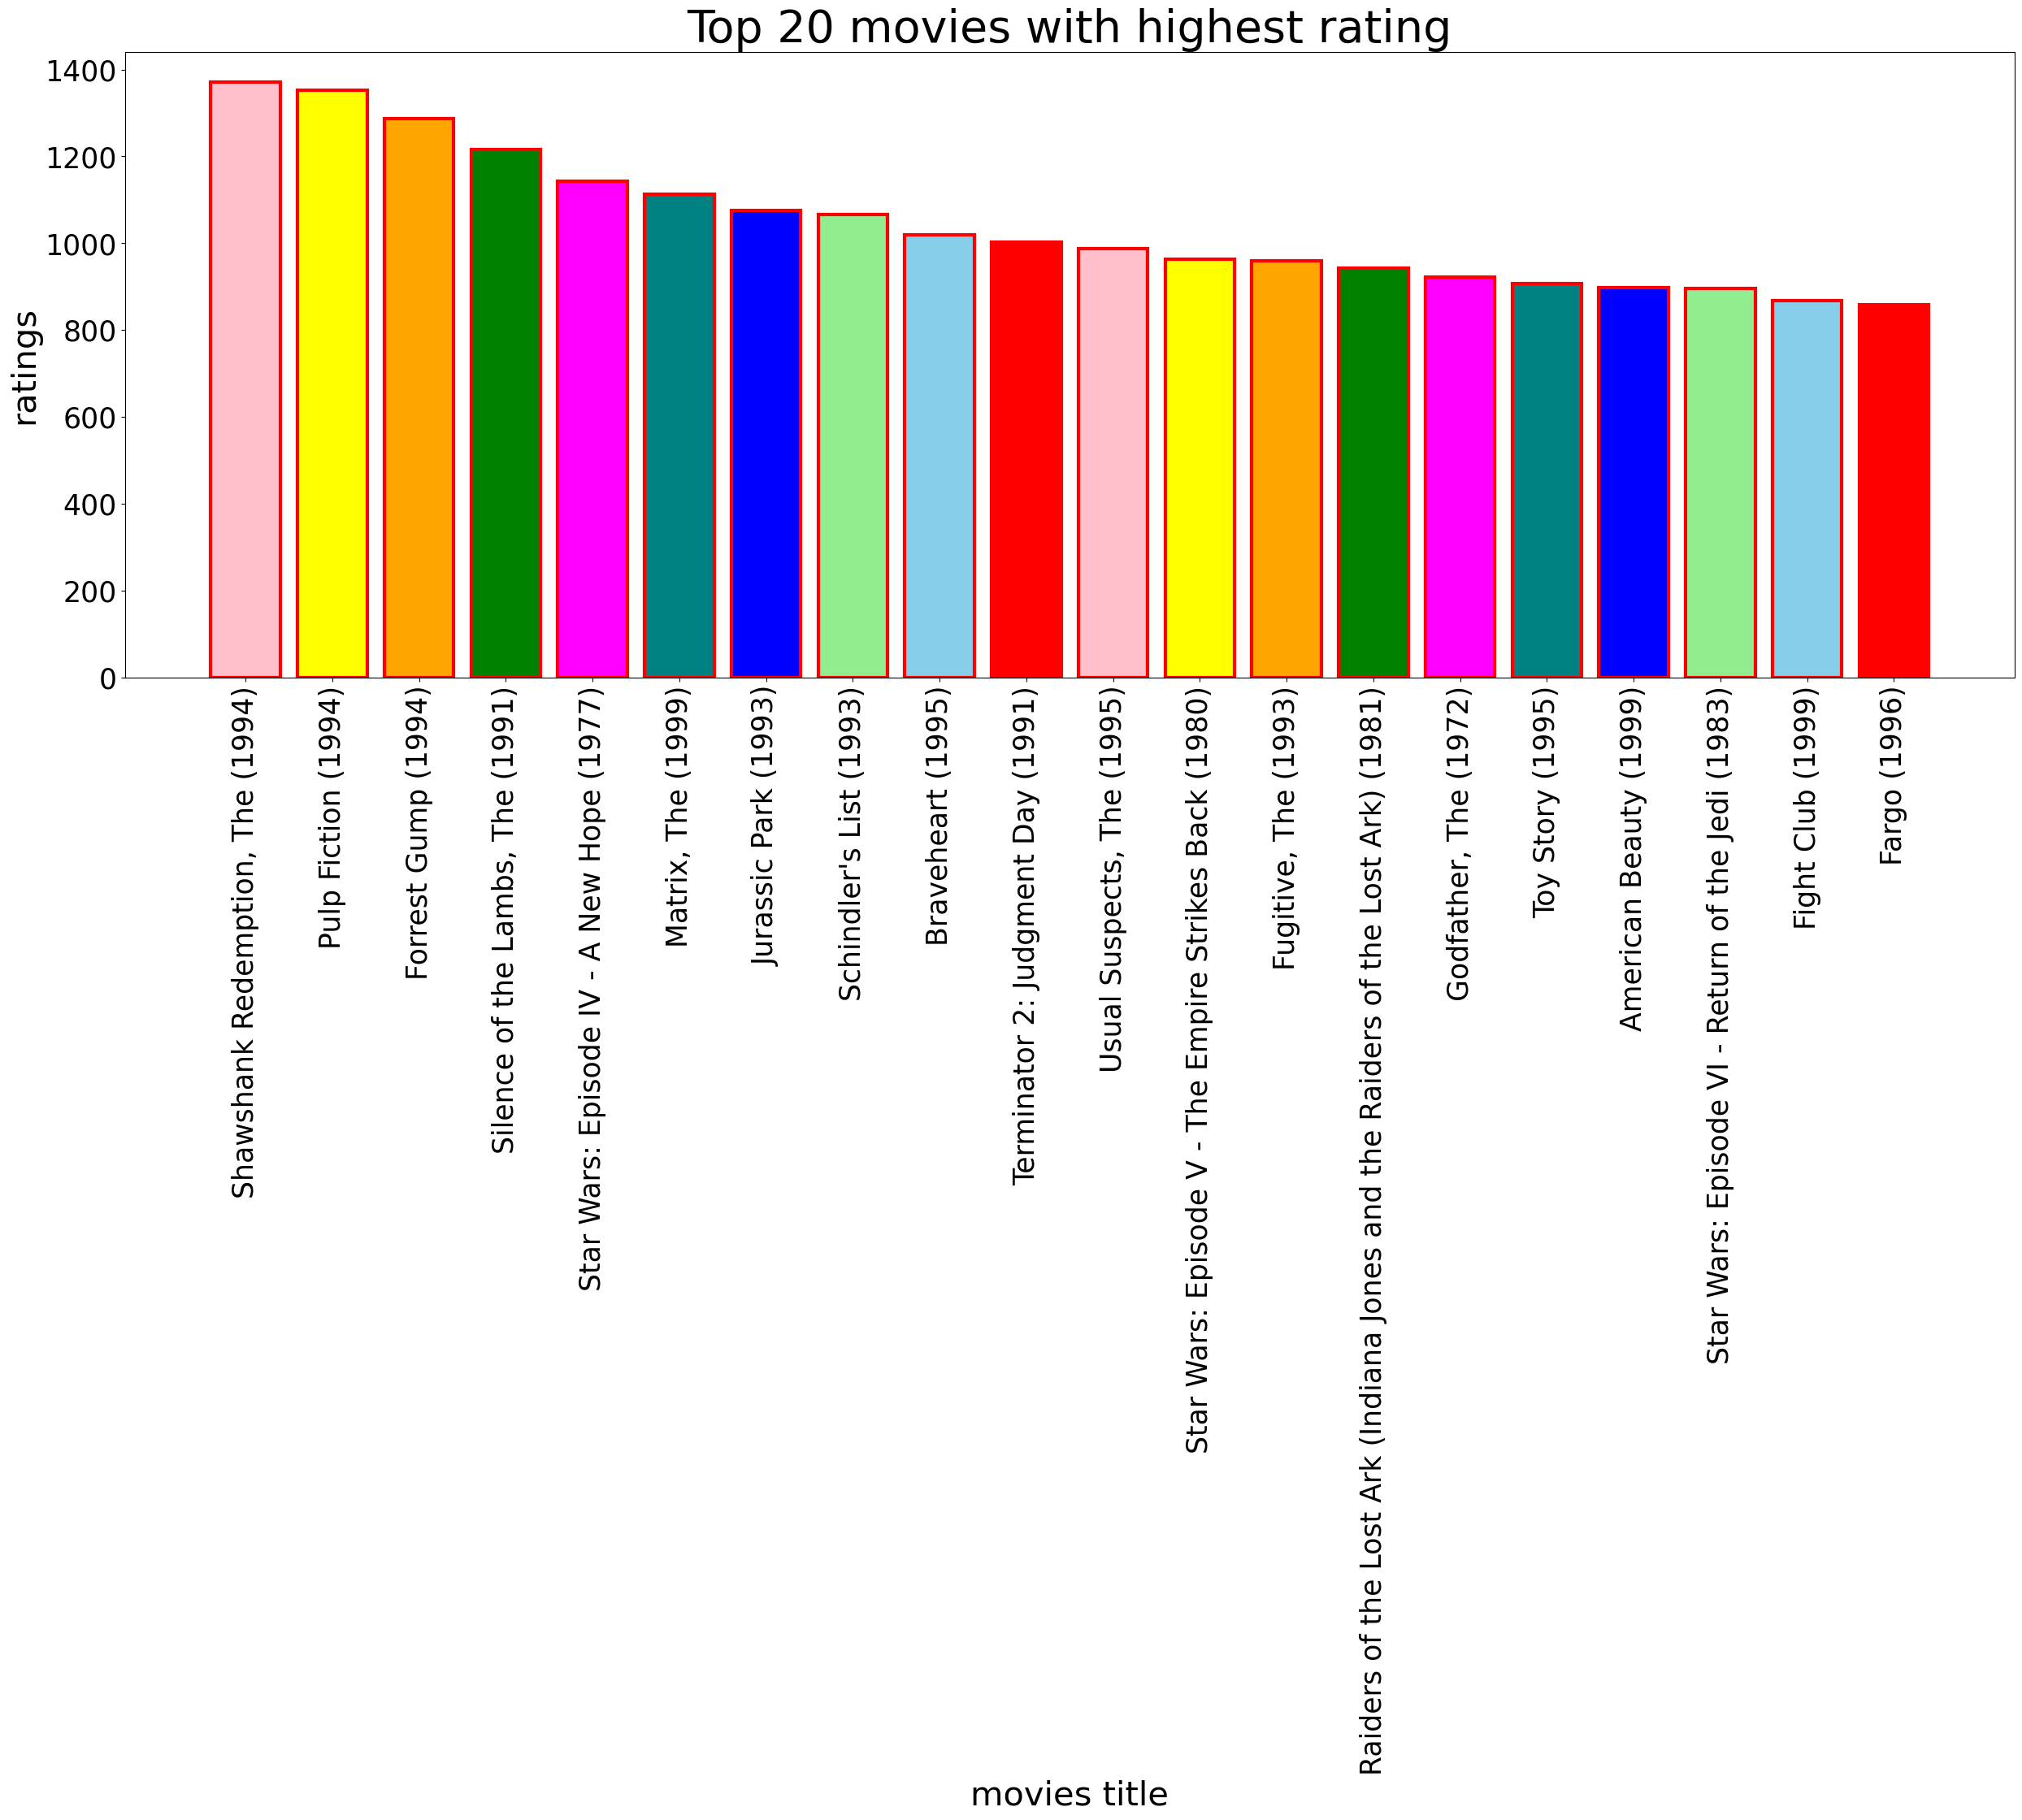

In [61]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
colors=['pink','yellow','orange','green','magenta','teal','blue','lightgreen','skyblue','red']
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='red',color=colors)


In [58]:
df2=df.groupby('title')[['rating']].count()
rating_count_20=df2.nlargest(20,'rating')
rating_count_20.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


<BarContainer object of 20 artists>

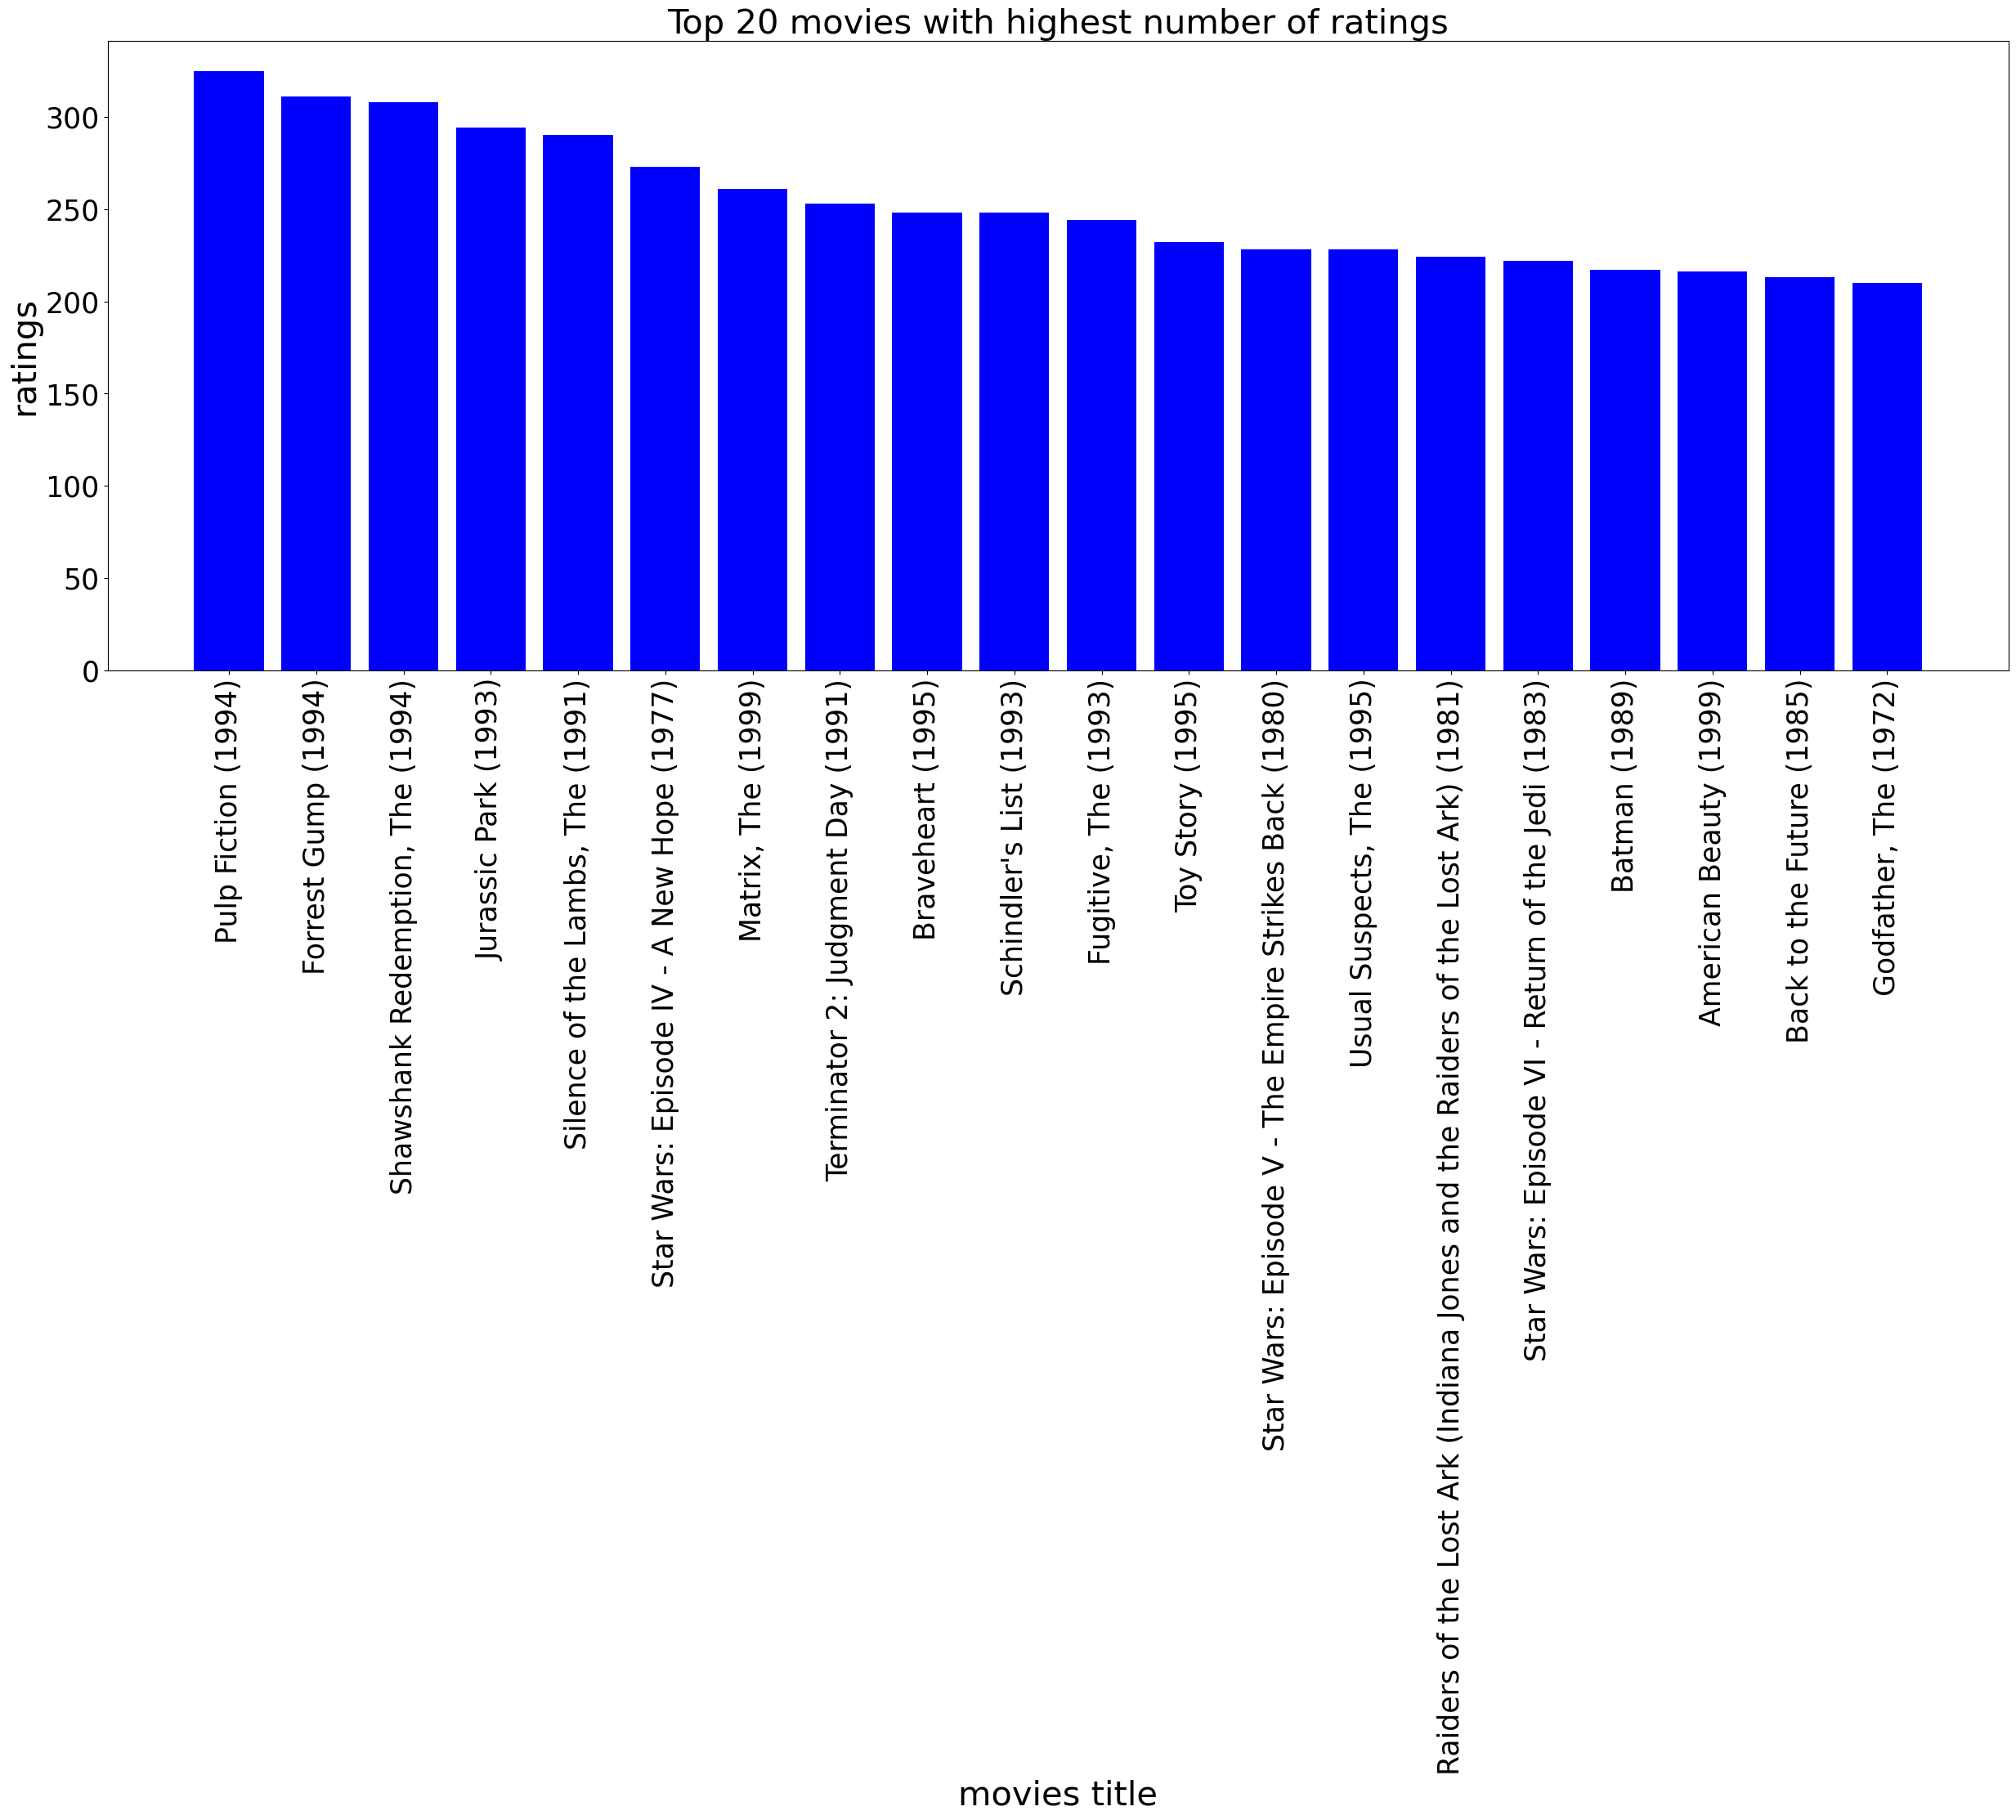

In [59]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest number of ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('movies title',fontsize=30)
plt.ylabel('ratings',fontsize=30)

plt.bar(rating_count_20.index,rating_count_20.rating,color='blue')

In [62]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movies['genres'])

In [63]:
movie_user = df.pivot_table(index='userId',columns='title',values='rating')
movie_user.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Suppose a user wants to watch a movie similar to Pulp Fiction (1994) then we can recommend the user by calculating the cosine similarity between Toy Story and other movies. 

In [65]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [66]:
indices=pd.Series(movies.index,index=movies['title'])
titles=movies['title']
def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [67]:
recommendations('Pulp Fiction (1994)')

537                                          Fargo (1996)
841                                        Freeway (1996)
2606    Man Bites Dog (C'est arrivé près de chez vous)...
4495               Confessions of a Dangerous Mind (2002)
4771                                Hard Word, The (2002)
6897                                    Cul-de-sac (1966)
7620                                     In Bruges (2008)
7972                                     Nobel Son (2007)
8233                               Informant!, The (2009)
8474                               Leaves of Grass (2009)
20                                      Get Shorty (1995)
1349                  Man Who Knew Too Little, The (1997)
1669                     Dead Men Don't Wear Plaid (1982)
2033             Lock, Stock & Two Smoking Barrels (1998)
2068                                 Goodbye Lover (1999)
3162                                        Snatch (2000)
5271                               Big Bounce, The (2004)
5749          

In [69]:
recommendations('Jurassic Park (1993)')

646       Independence Day (a.k.a. ID4) (1996)
690                    Escape from L.A. (1996)
914                          Abyss, The (1989)
916                Escape from New York (1981)
1102           Star Trek: First Contact (1996)
1115    Star Trek II: The Wrath of Khan (1982)
1243     Lost World: Jurassic Park, The (1997)
1271                              Spawn (1997)
2329                       Total Recall (1990)
2876                          Moonraker (1979)
3632                  Jurassic Park III (2001)
4059                      Clockstoppers (2002)
4108                         Spider-Man (2002)
4680                   X2: X-Men United (2003)
5400                You Only Live Twice (1967)
5732                           I, Robot (2004)
6662                  War of the Worlds (2005)
6684                            Stealth (2005)
7833                         Death Race (2008)
7845                       Babylon A.D. (2008)
Name: title, dtype: object

## COLLABORATIVE FILTERING

In [71]:
users = ratings['userId'].unique()
movies= ratings['movieId'].unique()

In [72]:
user_item_matrix = pd.DataFrame(0, index = users, columns = movies)

In [73]:
for _, row in ratings.iterrows():
    user_id=row['userId']
    movie_id=row['movieId']
    rating=row['rating']
    user_item_matrix.at[user_id, movie_id]=rating

In [74]:
user_item_matrix = user_item_matrix.fillna(0)

In [77]:
user_similarity_matrix = pd.DataFrame(cosine_similarity(user_item_matrix), index = users, columns = users)

In [78]:
user_similarity_matrix = ([[0.8,0.6,0.4],
                          [0.6,1.0,0.2],
                          [0.4,0.2,0.9]])

In [79]:
k = 2

In [87]:
user_neighborhood= {}
for i, user in enumerate (users):
    similarity_values = user_similarity_matrix[::1]
    sorted_indices = np.argsort(similarity_values)[::-1]
    
    neighborhood = sorted_indices[1:k+1]
    user_neighborhood[user]=neighborhood

In [88]:
user_rating= {'User1': {1: 4.5, 2:3.0, 3:2.5},
              'User2': {1: 2.0, 2:4.0, 3:3.5},
              'User3': {1: 5.0, 2:4.0, 3:3.0}}
              

In [89]:
user_neighborhood = {'User1': ['User2','User3'],
                     'User2': ['User1','User3'],
                     'User3': ['User1','User2']}

In [94]:
target_user = 'User1'

In [95]:
N=5

In [97]:
neighborhood = user_neighborhood[target_user]
unrated_items = {item for item in user_item_matrix.columns if item not in user_rating[target_user]}

In [100]:
aggregated_ratings = {}
for item in unrated_items:
    ratings = [user_rating[neighbor][item] for neighbor in neighborhood if item in user_rating[neighbor]]
    if ratings:
        aggregated_ratings[item] = np.mean(ratings)

In [101]:
ranked_items = sorted(aggregated_ratings, key=aggregated_ratings.get, reverse=True)

In [106]:
recommendations = ranked_items[:N]